#Sentiment Analysis for Movies Dataset

In [ ]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex

nltk.download('popular')
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence

In [ ]:
!pip install contractions

In [ ]:
!pip install autocorrect

In [7]:
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings

In [9]:
import numpy as np
import pandas as pd
train_data = pd.read_csv('train.tsv', delimiter='\t', index_col = 'PhraseId')

In [10]:
train_data.head()

,SentenceId,Phrase,Sentiment
PhraseId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,1,A series of escapades demonstrating the adage ...,2
3,1,A series,2
4,1,A,2
5,1,series,2


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156060 entries, 1 to 156060
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   SentenceId  156060 non-null  int64 
 1   Phrase      156060 non-null  object
 2   Sentiment   156060 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [12]:
train_data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

In [14]:
train_data['Length'] = train_data['Phrase'].apply(len)

<Axes: ylabel='Frequency'>

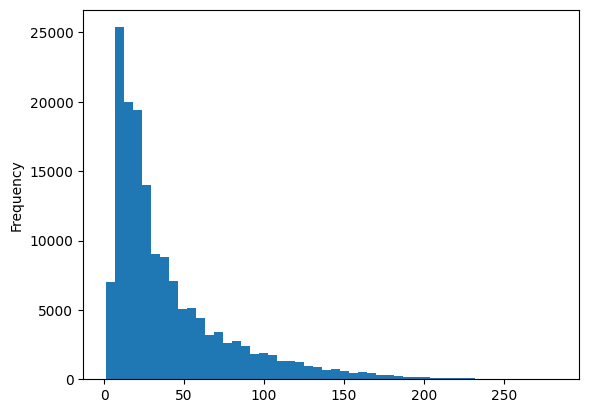

In [15]:
train_data['Length'].plot(kind = 'hist' , bins = 50)

Text(0.5, 0.98, 'Length via each Sentiment')

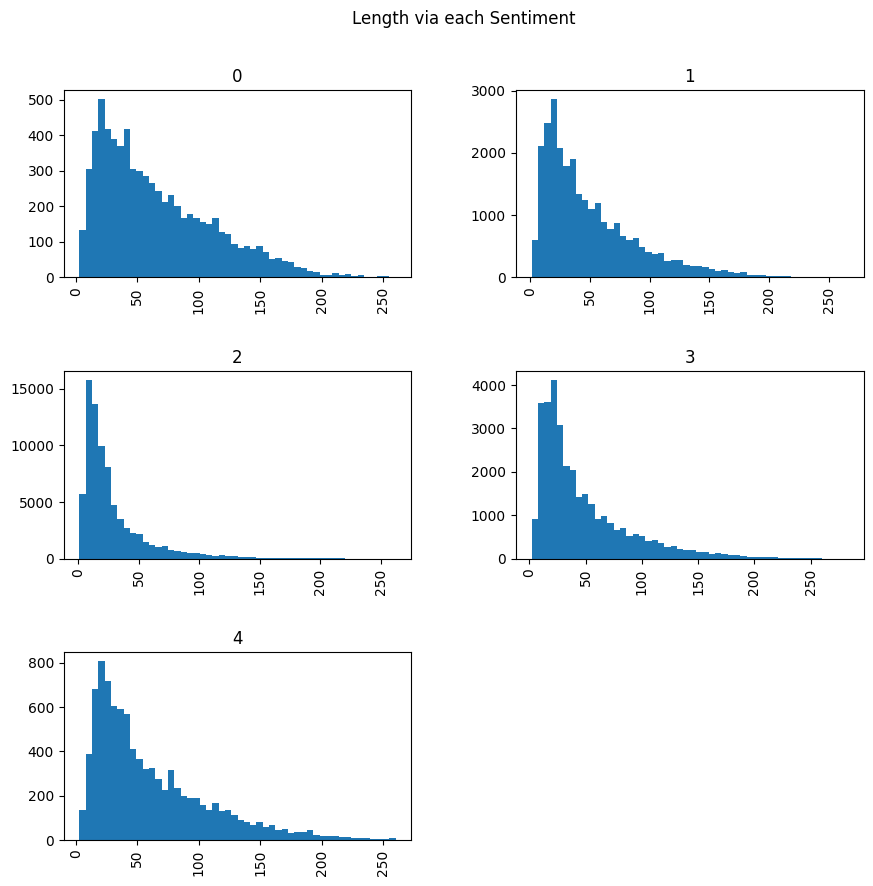

In [16]:
ax = train_data.hist(column = 'Length', by = 'Sentiment', bins = 50 , figsize = (10,10));
pl.suptitle('Length via each Sentiment')

In [18]:
def sentence_tokenize(text):
    """
    take string input and return a list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    return nltk.sent_tokenize(text)
def word_tokenize(text):
    """
    :param text:
    :return: list of words
    """
    return nltk.word_tokenize(text)


In [19]:
train_data['Phrase'].apply(sentence_tokenize)

PhraseId
1         [A series of escapades demonstrating the adage...
2         [A series of escapades demonstrating the adage...
3                                                [A series]
4                                                       [A]
5                                                  [series]
                                ...                        
156056                                          [Hearst 's]
156057                          [forced avuncular chortles]
156058                                 [avuncular chortles]
156059                                          [avuncular]
156060                                           [chortles]
Name: Phrase, Length: 156060, dtype: object

In [20]:
def to_lower(text):
        """
        :param text:
        :return:
            Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        """
        return text.lower()

In [22]:
train_data['Phrase'].apply(to_lower)

PhraseId
1         a series of escapades demonstrating the adage ...
2         a series of escapades demonstrating the adage ...
3                                                  a series
4                                                         a
5                                                    series
                                ...                        
156056                                            hearst 's
156057                            forced avuncular chortles
156058                                   avuncular chortles
156059                                            avuncular
156060                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [23]:
def autospell(text):
        """
        correct the spelling of the word.
        """
        spells = [spell(w) for w in (nltk.word_tokenize(text))]
        return " ".join(spells)

In [27]:
def remove_numbers(text):
        """
        take string input and return a clean text without numbers.
        Use regex to discard the numbers.
        """
        output = ''.join(c for c in text if not c.isdigit())
        return output

In [28]:
z = pd.Series(['a1', 'b2e', 'a3'])
z.apply(remove_numbers)

0     a
1    be
2     a
dtype: object

In [29]:
def remove_punct(text):
        return ''.join(c for c in text if c not in punctuation)

In [30]:
def remove_stopwords(sentence):
        """
        removes all the stop words like "is,the,a, etc."
        """
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [31]:
print(train_data['Phrase'][9:11])
train_data['Phrase'][9:11].apply(remove_stopwords)

PhraseId
10    demonstrating the adage that what is good for ...
11                              demonstrating the adage
Name: Phrase, dtype: object


PhraseId
10    demonstrating adage good goose
11               demonstrating adage
Name: Phrase, dtype: object

In [32]:
def lemmatize(text):
        wordnet_lemmatizer = WordNetLemmatizer()
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for word in nltk.word_tokenize(text)]
        return " ".join(lemmatized_word)

In [34]:
def preprocess(text):
        lower_text = to_lower(text)
        sentence_tokens = sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = remove_numbers(lemmatizzed_sent)
            clean_text = remove_punct(clean_text)
            clean_text = remove_stopwords(clean_text)
            word_tokens = word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

In [35]:
sample_data = train_data['Phrase'].head(5)
print(sample_data)
sample_data.apply(preprocess)

PhraseId
1    A series of escapades demonstrating the adage ...
2    A series of escapades demonstrating the adage ...
3                                             A series
4                                                    A
5                                               series
Name: Phrase, dtype: object


PhraseId
1    [series, escapade, demonstrating, adage, good,...
2    [series, escapade, demonstrating, adage, good,...
3                                             [series]
4                                                   []
5                                             [series]
Name: Phrase, dtype: object

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
bow = CountVectorizer(analyzer=preprocess)

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

In [39]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [40]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [41]:
pipeline.fit(train_data['Phrase'],train_data['Sentiment'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function preprocess at 0x7a4f0d454940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [42]:
pipeline.score(train_data['Phrase'], train_data['Sentiment'])

0.6331475073689606

In [43]:
from sklearn.metrics import classification_report

all_predictions = pipeline.predict(train_data['Phrase'])
print(classification_report(train_data['Sentiment'], all_predictions))

              precision    recall  f1-score   support

           0       0.77      0.08      0.15      7072
           1       0.61      0.34      0.43     27273
           2       0.64      0.92      0.76     79582
           3       0.60      0.45      0.51     32927
           4       0.78      0.10      0.18      9206

    accuracy                           0.63    156060
   macro avg       0.68      0.38      0.41    156060
weighted avg       0.64      0.63      0.59    156060

